# Exploring the dataset

The goal of this notebook is to explore the dataset and visualize the images with the bounding boxes.

Dataset: [Mapillary Trafic Sign Dataset](https://www.mapillary.com/dataset/trafficsign) -> Download sample

In [1]:
# Import 
import matplotlib.pyplot as plt
import os
import json
import cv2

## Functions

In [2]:
# Read the json file and return the boxes and labels
def read_jsone_file(file):
    boxes_and_labels = []
    with open(f'{path}/{file}') as f:
        data = json.load(f)
        for obj in data['objects']:
            # The label is the name of the object and the bbox is the bounding box
            boxes_and_labels.append({
                'bbox': obj['bbox'],
                'label': obj['label']
            })
    return boxes_and_labels

In [3]:
# Read the image from the json name
def image_from_json_name(json_name):
    image = cv2.imread(f'{path}/{json_name.replace(".json", ".jpg")}')
    # Convert the image from BGR to RGB (OpenCV uses BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
# Show the image
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [5]:
# Show the boxes on the image
def show_boxes(json_name, boxes, min_area=0):
    image = image_from_json_name(json_name)
    for box in boxes:
        bbox = box['bbox']
        # The bounding box is in the format xmin, ymin, xmax, ymax
        xmin, ymin, xmax, ymax = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
        # Convert the coordinates to integers (OpenCV requires integers)
        xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
        if (xmax - xmin) * (ymax - ymin) < min_area:
            continue
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
        
    show_image(image)

## Show the images

In [6]:
# Path to the dataset
path = 'dataset/Europe'

# List all the files in the folder
files = os.listdir(path)
jsons = [file for file in files if file.endswith('.json')]

In [7]:
data = []
# The name of the json file is the same as the image file
for json_file in jsons:
    data.append(read_jsone_file(json_file))

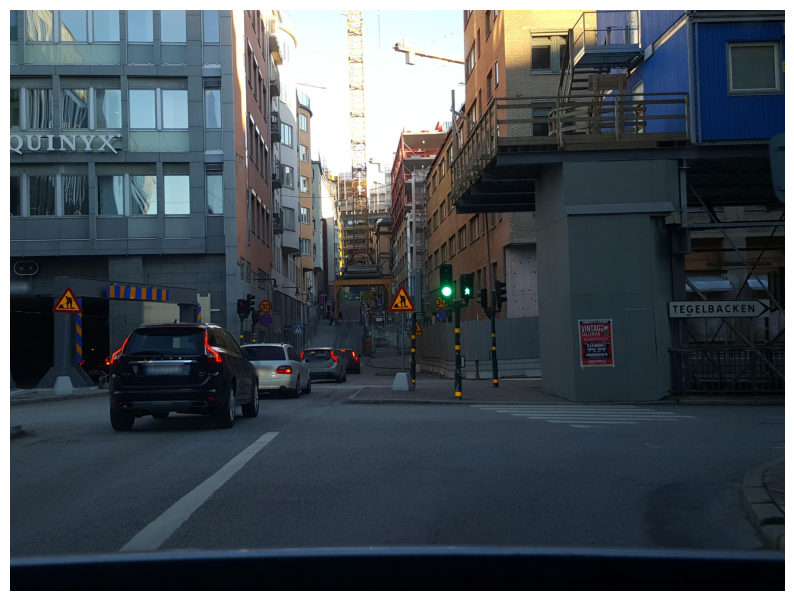

In [8]:
image = image_from_json_name(jsons[0])
show_image(image)

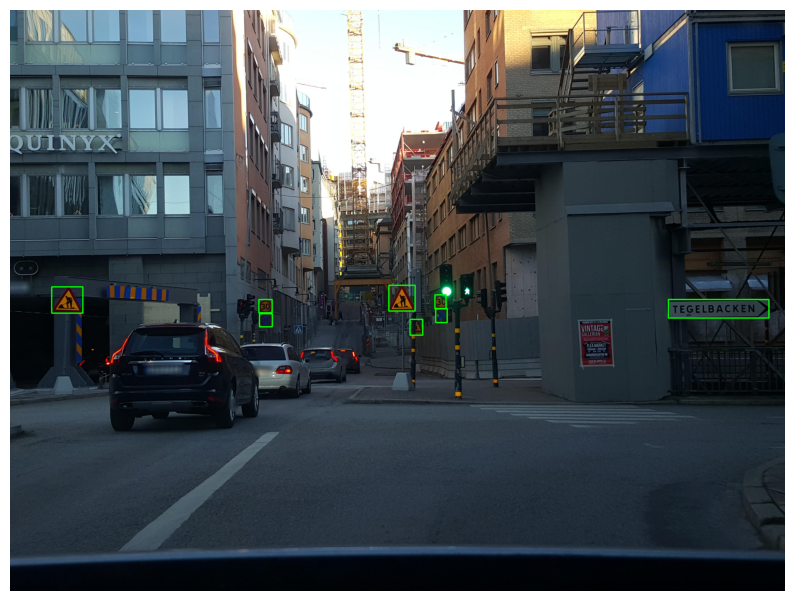

In [9]:
show_boxes(jsons[0], data[0], min_area=2500)

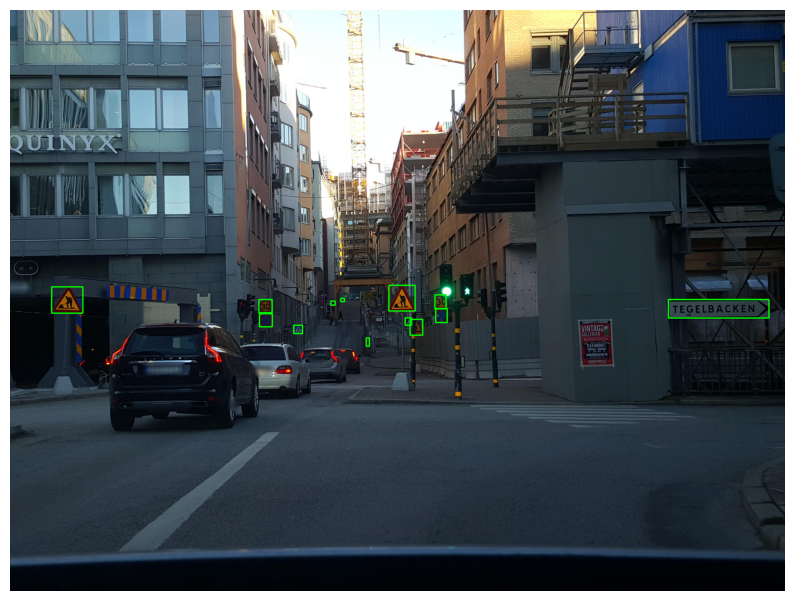

In [10]:
show_boxes(jsons[0], data[0], min_area=0)
